In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
np.random.seed(2343243)

In [3]:
mean_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 100)

In [4]:
mean_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mean_vec2, cov_mat2, 100)

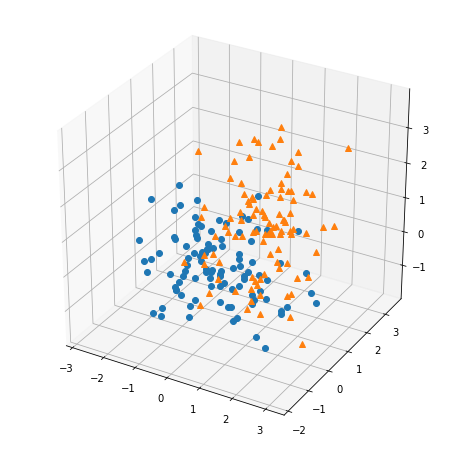

In [6]:
from mpl_toolkits.mplot3d import Axes3D, proj3d
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
ax.plot(class1[:,0], class1[:,1], class1[:,2],'o')
ax.plot(class2[:,0], class2[:,1], class2[:,2],'^')
plt.show()

In [7]:
all_data = np.concatenate((class1, class2))
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(all_data)
X_transformed

array([[-0.52351425, -0.63301617],
       [-0.78786184,  0.94206431],
       [-1.28725924,  0.54439067],
       [ 0.66747707,  1.69846274],
       [-1.74150174, -0.755306  ],
       [-1.03559449, -1.53950125],
       [-0.21765053, -0.85555712],
       [-0.7648506 , -0.46590375],
       [-0.64255217,  1.16920769],
       [-0.5783154 , -0.30888845],
       [ 0.25251683, -0.38101091],
       [-0.26298255, -0.44282938],
       [-0.86147962,  0.21339394],
       [-0.9917517 , -0.32293363],
       [-1.3133147 ,  0.01268907],
       [-1.09145198, -0.50248537],
       [-2.05840949, -1.13678107],
       [-0.62975084, -1.78591257],
       [-1.75005325, -1.27909834],
       [-0.66142546,  1.66188479],
       [-0.34624366,  0.47524286],
       [ 0.77989322,  0.76153114],
       [-0.22203858, -0.7362751 ],
       [-1.06469867,  0.33693758],
       [-1.93640401, -0.97234577],
       [-2.44237038, -0.34276504],
       [-1.7918403 ,  0.40615644],
       [ 0.33656537,  1.36869154],
       [-1.38894876,

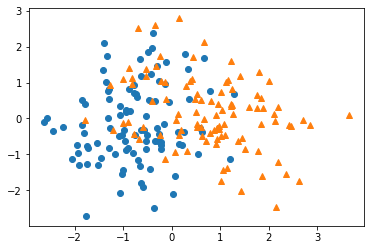

In [8]:
plt.plot(X_transformed[:100, 0],X_transformed[:100,1],'o')
plt.plot(X_transformed[100:200, 0],X_transformed[100:200,1],'^')

In [10]:
X_approx = pca.inverse_transform(X_transformed)
X_approx

array([[-3.35664295e-01,  4.13176049e-01,  3.02295557e-01],
       [ 9.89948385e-01, -1.69348317e-01, -3.71629178e-01],
       [ 4.22437580e-01, -3.89188594e-01, -5.64356504e-01],
       [ 2.27725356e+00,  5.76386779e-01,  3.18931815e-01],
       [-9.47917821e-01, -3.44276035e-01, -4.39230092e-01],
       [-1.37173271e+00,  3.17949615e-01,  2.64407149e-01],
       [-4.12532897e-01,  6.69504342e-01,  5.69623284e-01],
       [-2.82734282e-01,  2.13138481e-01,  9.40812870e-02],
       [ 1.25655122e+00, -1.34472617e-01, -3.51242174e-01],
       [-6.30387695e-02,  2.93040543e-01,  1.63354108e-01],
       [ 2.12960082e-01,  8.50331775e-01,  7.18993342e-01],
       [-5.53308896e-02,  5.32375288e-01,  4.08373388e-01],
       [ 2.96120162e-01, -2.68286325e-02, -1.85428702e-01],
       [-2.45852686e-01,  2.87591482e-02, -9.71478230e-02],
       [-7.24640551e-02, -2.67265701e-01, -4.10757511e-01],
       [-4.50360202e-01,  1.10183186e-02, -1.03543775e-01],
       [-1.42562955e+00, -4.50073651e-01

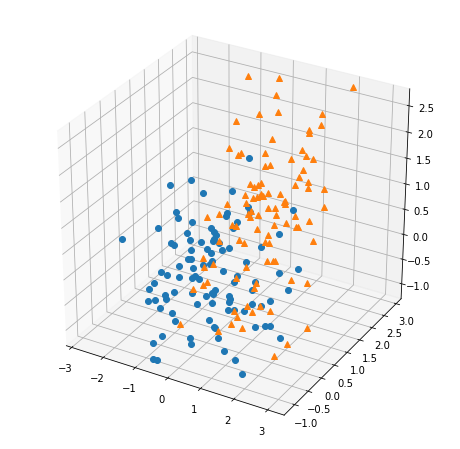

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
ax.plot(X_approx[:100,0], X_approx[:100,1], X_approx[:100,2],'o')
ax.plot(X_approx[100:200,0], X_approx[100:200,1], X_approx[100:200,2],'^')
plt.show()

## PCA Implementation

In [17]:
cov = np.cov(all_data, rowvar = False)
cov

array([[1.14139998, 0.1061989 , 0.0918139 ],
       [0.1061989 , 1.11579657, 0.27166986],
       [0.0918139 , 0.27166986, 1.11826602]])

In [18]:
eig_val, eig_vectors = np.linalg.eig(cov)
eig_val, eig_vectors

(array([1.45186534, 1.07866114, 0.8449361 ]),
 array([[ 0.41124564,  0.91063567,  0.0402454 ],
        [ 0.64810013, -0.26106644, -0.71540934],
        [ 0.64097055, -0.32029202,  0.69754554]]))

In [20]:
eig_val_vector_pairs = []
for i in range(len(eig_val)):
    eig_vec = eig_vectors[:,i]
    eig_val_vector_pairs.append((eig_val[i],eig_vec))
eig_val_vector_pairs.sort(reverse = True)
eig_val_vector_pairs

[(1.4518653417359286, array([0.41124564, 0.64810013, 0.64097055])),
 (1.0786611401978583, array([ 0.91063567, -0.26106644, -0.32029202])),
 (0.8449360955327045, array([ 0.0402454 , -0.71540934,  0.69754554]))]

In [22]:
pca.components_

array([[ 0.41124564,  0.64810013,  0.64097055],
       [ 0.91063567, -0.26106644, -0.32029202]])

In [23]:
pca.explained_variance_

array([1.45186534, 1.07866114])